In [211]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io
from skimage import io

#To directly use the function
from skimage.feature import hog
from skimage.transform import rescale,resize
from skimage.color import rgb2grey


## Import data

In [212]:
# Honey bee as 0.0
# Bumble bee as 1.0

labels = pd.read_csv('dataset/labels.csv', index_col=0)
labels.head()

,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


In [213]:
print(len(labels[labels.genus==1.0]),len(labels[labels.genus==0.0]))

3142 827


In [214]:
def get_image(row_id, root='dataset/images/'):
    
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = io.imread(file_path)
    
    return np.array(img)

### Set of bumblee bee 1.0

In [215]:
positive_patches=[]

for i in range(len(labels[labels.genus==1.0])):
    bumblee_bee_row = labels[labels.genus==1.0].index[i]
    bumblee_bee = get_image(bumblee_bee_row)
    img_to_gray=rgb2grey(bumblee_bee)
    img_to_gray = rescale(img_to_gray, 0.5) 

    positive_patches.append(img_to_gray)

In [217]:
print(len(positive_patches))
positive_patches[0].shape

3142


(100, 100)

### Set of Honeybee 0.0

In [218]:
images=[]

for i in range(len(labels[labels.genus==0.0])):
    honey_bee_row = labels[labels.genus==0.0].index[i]
    honey_bee = get_image(honey_bee_row)
    img_to_gray=rgb2grey(honey_bee)
    img_to_gray = rescale(img_to_gray, 0.5) 
    images.append(img_to_gray)
images = np.asarray(images)
# images=images.flatten()

In [219]:
print(images.flatten().shape)

(8270000,)


In [220]:
print(len(images))
images[0].shape

827


(100, 100)

In [221]:
def features(image):
    # flatten three channel color image
    color_features = image.flatten()
#     print(color_features.shape)

    # get HOG features from greyscale image
    hog_features = hog(image, block_norm='L2-Hys', pixels_per_cell=(8,8))    
#     print(hog_features.shape)
    # combine color and hog features into a single array
    flat_features = np.hstack((color_features, hog_features))
    return flat_features

In [222]:
bumblee_bee_features = features(positive_patches[0])


In [223]:
# print shape of bombus_features
print('The array has shape:', bumblee_bee_features.shape)

The array has shape: (18100,)


In [224]:
single_features = features(positive_patches[0])
single_features.shape

(18100,)

In [227]:
def feature_matrix(array):
    features_list = []
    
    for i in range(len(array)):
        # get features for image
        image_features = features(array[i])
        features_list.append(image_features)
        # convert list of arrays into a matrix
        feature_matrix = np.array(features_list)
    
    return feature_matrix

# run create_feature_matrix on our dataframe of images
positive_feature_matrix = feature_matrix(positive_patches)
negative_feature_matrix = feature_matrix(images)

In [228]:
print(positive_feature_matrix.shape, negative_feature_matrix.shape)

(3142, 18100) (827, 18100)


In [15]:
positive_label=np.ones(len(positive_feature_matrix)).reshape(-1,1)
negative_label=np.zeros(len(negative_feature_matrix)).reshape(-1,1)

In [16]:
label_X=np.concatenate((positive_feature_matrix,negative_feature_matrix))
label_y=np.concatenate((positive_label,negative_label))

In [17]:
X=pd.DataFrame(label_X)
y=pd.DataFrame(label_y)


In [18]:
X

,0,1,2,3,4,5,6,7,8,9,...,18090,18091,18092,18093,18094,18095,18096,18097,18098,18099
0,0.439885,0.438162,0.424706,0.430746,0.458318,0.473671,0.476753,0.468016,0.461158,0.467136,...,0.149028,0.043389,0.131780,0.088498,0.082028,0.117894,0.108705,0.048627,0.073933,0.062441
1,0.172878,0.172201,0.173932,0.177733,0.184924,0.182511,0.178126,0.254360,0.554185,0.787118,...,0.030135,0.034661,0.024311,0.018938,0.102725,0.249643,0.045737,0.048102,0.000000,0.030866
2,0.679896,0.691023,0.581526,0.452563,0.403145,0.374648,0.418351,0.485857,0.610514,0.659370,...,0.064710,0.000000,0.019262,0.171385,0.097012,0.027145,0.005075,0.005191,0.000000,0.000496
3,0.430422,0.428756,0.434860,0.441580,0.452389,0.456540,0.461079,0.461090,0.447555,0.434589,...,0.224119,0.091252,0.171947,0.124587,0.083243,0.035421,0.041093,0.045048,0.044490,0.068433
4,0.723147,0.697821,0.676790,0.651906,0.624277,0.619955,0.634736,0.658536,0.681113,0.699430,...,0.149668,0.211011,0.083375,0.048273,0.069840,0.021323,0.059668,0.131290,0.211011,0.079154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,0.312737,0.273857,0.266179,0.275038,0.263484,0.282415,0.429487,0.581594,0.481229,0.316782,...,0.039240,0.094688,0.041310,0.090983,0.233744,0.097240,0.063136,0.110155,0.067914,0.167053
3965,0.188288,0.228981,0.124477,0.161363,0.264312,0.498377,0.519610,0.496860,0.459399,0.452002,...,0.240459,0.119875,0.107106,0.240459,0.045550,0.166523,0.055459,0.058095,0.004454,0.107002
3966,0.544533,0.512066,0.422708,0.463992,0.560755,0.681854,0.674806,0.407690,0.435993,0.452617,...,0.009722,0.158809,0.074920,0.105285,0.072356,0.066477,0.053114,0.005330,0.094172,0.167799
3967,0.593601,0.606274,0.609996,0.601326,0.602564,0.604640,0.607663,0.610060,0.600270,0.586118,...,0.000000,0.004178,0.003242,0.009213,0.242985,0.117262,0.047636,0.003769,0.000755,0.000554


In [19]:
y

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
3964,0.0
3965,0.0
3966,0.0
3967,0.0


In [20]:
df=pd.concat([X,y],axis=1)

In [21]:
df.iloc[:,-1]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3964    0.0
3965    0.0
3966    0.0
3967    0.0
3968    0.0
Name: 0, Length: 3969, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data.shape)

(3969, 18100)


In [24]:
pca = PCA(n_components=500)

# # use fit_transform to run PCA on our standardized matrix
pca_data = pca.fit_transform(scaled_data)

# # look at new shape
print('PCA matrix shape is: ', pca_data.shape)

PCA matrix shape is:  (3969, 500)


In [25]:
pca_data.shape

(3969, 500)

## Save PCA value for further use

In [30]:
pca_X=pd.DataFrame(pca_data)
pca_y=pd.DataFrame(label_y)
pca_df=pd.concat([pca_X,pca_y],axis=1)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,0
0,13.369608,4.997050,-35.839906,1.645782,-10.838336,18.587056,-3.665177,9.813953,17.119590,-7.881559,...,-1.989934,-1.937450,1.277379,-1.321233,1.576726,1.721007,4.341895,-4.135440,-1.249143,1.0
1,23.879396,77.691191,9.841990,-42.182856,-0.804337,-15.295236,-18.412257,7.860193,-6.064456,40.486043,...,2.774226,-2.051870,0.955698,-0.440675,4.009096,-3.093669,3.478665,-0.668417,-1.901585,1.0
2,48.871753,-4.216883,-9.128006,-31.537281,-15.627373,-13.375401,8.229327,7.510331,22.760047,-11.286881,...,0.425203,-4.613065,3.088296,2.208019,2.676963,0.258058,-2.122044,-1.270513,-2.276765,1.0
3,34.248113,-29.036858,-7.669862,-23.066531,-0.985512,5.025549,-2.780466,-1.884529,15.583150,-8.648788,...,0.828193,-1.547936,-2.955235,-0.015273,-2.749190,-3.548030,-2.473856,-5.859767,0.648273,1.0
4,-14.896189,33.447135,24.863947,-27.013489,2.341393,5.779110,1.293877,25.094439,13.074261,17.157477,...,1.718024,2.872644,0.017070,-0.284294,2.143936,-1.504421,3.841100,3.527771,-1.696002,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,13.439499,-2.732395,28.777482,17.347145,19.041487,-8.704166,22.922247,-21.294865,7.134422,7.357681,...,3.116760,-1.604107,-1.692865,0.043061,2.197493,1.911180,-6.212299,1.557718,-0.710130,0.0
3965,49.524229,6.249566,33.834276,31.507004,9.508049,-3.890573,20.712210,-4.142361,-4.780019,0.258711,...,-1.238029,3.594358,0.793595,4.582353,-1.850452,5.324780,1.917576,-5.541817,-0.096904,0.0
3966,-39.090635,-17.797108,-16.961461,51.748392,-23.302438,-40.132435,44.272582,-29.518037,19.570542,-25.076853,...,2.891940,-1.768507,-3.161733,-0.322507,-5.056391,2.431740,1.239734,-1.877065,2.079146,0.0
3967,63.954043,-24.303040,11.418657,-2.828174,13.951333,-9.466474,3.309596,5.919179,-6.212288,-4.411919,...,1.771043,1.197928,1.094496,-6.095995,-3.290312,-0.736202,-0.273191,-3.500533,-4.501231,0.0


In [34]:
pca_df.to_csv('PCADataset',encoding='utf-8', index=False)

## Train Test Split

In [35]:
# df.to_csv('hog_dataframe', encoding='utf-8', index=False)

In [36]:
# data=pd.read_csv('hog_dataframe')

In [88]:
data=pd.read_csv('PCADataset')
data

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,0.1
0,13.369608,4.997050,-35.839906,1.645782,-10.838336,18.587056,-3.665177,9.813953,17.119590,-7.881559,...,-1.989934,-1.937450,1.277379,-1.321233,1.576726,1.721007,4.341895,-4.135440,-1.249143,1.0
1,23.879396,77.691191,9.841990,-42.182856,-0.804337,-15.295236,-18.412257,7.860193,-6.064456,40.486043,...,2.774226,-2.051870,0.955698,-0.440675,4.009096,-3.093669,3.478665,-0.668417,-1.901585,1.0
2,48.871753,-4.216883,-9.128006,-31.537281,-15.627373,-13.375401,8.229327,7.510331,22.760047,-11.286881,...,0.425203,-4.613065,3.088296,2.208019,2.676963,0.258058,-2.122044,-1.270513,-2.276765,1.0
3,34.248113,-29.036858,-7.669862,-23.066531,-0.985512,5.025549,-2.780466,-1.884529,15.583150,-8.648788,...,0.828193,-1.547936,-2.955235,-0.015273,-2.749190,-3.548030,-2.473856,-5.859767,0.648273,1.0
4,-14.896189,33.447135,24.863947,-27.013489,2.341393,5.779110,1.293877,25.094439,13.074261,17.157477,...,1.718024,2.872644,0.017070,-0.284294,2.143936,-1.504421,3.841100,3.527771,-1.696002,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,13.439499,-2.732395,28.777482,17.347145,19.041487,-8.704166,22.922247,-21.294865,7.134422,7.357681,...,3.116760,-1.604107,-1.692865,0.043061,2.197493,1.911180,-6.212299,1.557718,-0.710130,0.0
3965,49.524229,6.249566,33.834276,31.507004,9.508049,-3.890573,20.712210,-4.142361,-4.780019,0.258711,...,-1.238029,3.594358,0.793595,4.582353,-1.850452,5.324780,1.917576,-5.541817,-0.096904,0.0
3966,-39.090635,-17.797108,-16.961461,51.748392,-23.302438,-40.132435,44.272582,-29.518037,19.570542,-25.076853,...,2.891940,-1.768507,-3.161733,-0.322507,-5.056391,2.431740,1.239734,-1.877065,2.079146,0.0
3967,63.954043,-24.303040,11.418657,-2.828174,13.951333,-9.466474,3.309596,5.919179,-6.212288,-4.411919,...,1.771043,1.197928,1.094496,-6.095995,-3.290312,-0.736202,-0.273191,-3.500533,-4.501231,0.0


## Save MODEL 

In [89]:
# import pickle as pk
# pk.dump(pca_data, open("pca.pkl","wb"))


## Load MODEL

In [90]:
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(scaled_data)

In [91]:
from sklearn.model_selection import train_test_split


In [92]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]
print(data.shape, X.shape, y.shape)

(3969, 501) (3969, 500) (3969,)


In [93]:
X_train,X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25, random_state=27)

In [94]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score,roc_auc_score,roc_curve

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [129]:
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score)

## Logistic Regression

In [98]:
logistic = linear_model.LogisticRegression()

In [99]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

#From documentation:  ‘liblinear’ and ‘saga’ also handle L1 penalty. 
#For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
solver=['liblinear', 'saga']

# Create hyperparameter options
hyperparameters = dict(C=C,
                       penalty=penalty,
                       solver=solver)




In [100]:
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0,scoring=f1_scorer)
#cv=5 and verbose=0 is default.

In [101]:
best_model = clf.fit(X_train, y_train)

In [102]:
print('Best Score: ', best_model.best_score_)
print('Best Params: ', best_model.best_params_)

Best Score:  0.8313272857652183
Best Params:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [103]:
params=best_model.best_params_
params['C']

1.0

In [104]:
best_logistic = linear_model.LogisticRegression(C=params['C'],penalty=params['penalty'] ,solver=params['solver'])
best_model = best_logistic.fit(X_train, y_train)
y_train_pred=best_model.predict(X_train)
y_pred = best_model.predict(X_test)

print('\tClassification Report of best feature')
print(metrics.classification_report(y_test,y_pred))

print('Train Accuracy:\t{0:.3f}'.format(accuracy_score(y_train_pred, y_train)))
print('Test Accuracy:\t {0:.3f}'.format(accuracy_score(y_pred, y_test)))

	Classification Report of best feature
              precision    recall  f1-score   support

         0.0       0.31      0.26      0.28       207
         1.0       0.81      0.85      0.83       786

    accuracy                           0.73       993
   macro avg       0.56      0.55      0.56       993
weighted avg       0.71      0.73      0.72       993

Train Accuracy:	0.836
Test Accuracy:	 0.728


Logistic: ROC AUC Score=0.629


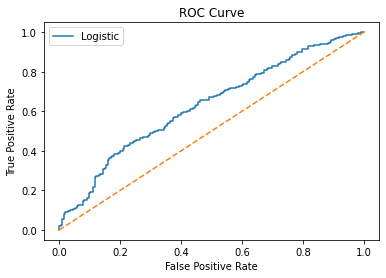

In [105]:
lr_probs = best_logistic.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Logistic: ROC AUC Score=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, label='Logistic')
plt.plot([0,1], [0,1], ls='--')

# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


# Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
from sklearn.model_selection import GridSearchCV

grid_params={
    'n_estimators':[5,10],
    'max_depth': [5,10],
    'min_samples_split': [6, 8],
    'max_features':[0.6,0.8],
}

In [130]:
clf=GridSearchCV(RandomForestClassifier(random_state=27),grid_params,scoring=f1_scorer)

clf.fit(X_train,y_train)
print('Best score: ', clf.best_score_,clf.best_params_)
clf.score(X_test,y_test)

Best score:  0.8831177691784843 {'max_depth': 5, 'max_features': 0.8, 'min_samples_split': 6, 'n_estimators': 10}


0.8813174332765474

In [131]:
best_model=clf.best_estimator_
best_model.fit(X_train,y_train)

y_preds_final =best_model.predict(X_test)
print(accuracy_score(y_test,y_preds_final))

0.7895266868076536


In [132]:
print('\tClassification Report of best feature Random Forest')
print(metrics.classification_report(y_test,y_preds_final))

print('Train Accuracy:\t{0:.3f}'.format(accuracy_score(y_train_pred, y_train)))
print('Test Accuracy:\t {0:.3f}'.format(accuracy_score(y_pred, y_test)))

	Classification Report of best feature Random Forest
              precision    recall  f1-score   support

         0.0       0.44      0.04      0.07       207
         1.0       0.80      0.99      0.88       786

    accuracy                           0.79       993
   macro avg       0.62      0.51      0.48       993
weighted avg       0.72      0.79      0.71       993

Train Accuracy:	0.846
Test Accuracy:	 0.756


Random Forest: ROC AUC Score=0.637


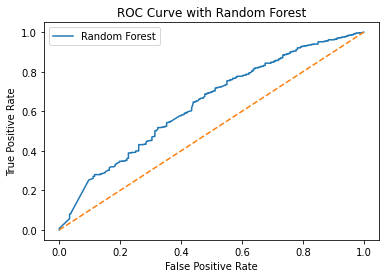

In [134]:
lr_probs = best_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Forest: ROC AUC Score=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, label='Random Forest')
plt.plot([0,1], [0,1], ls='--')
# axis labels
plt.title('ROC Curve with Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Gaussian NB

In [229]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [230]:
clf = gnb.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test,y_test))

0.756294058408862


In [231]:
y_train_pred=clf.predict(X_train)
y_preds_final =clf.predict(X_test)
print(accuracy_score(y_test,y_preds_final))

0.756294058408862


In [232]:
print('\tClassification Report of Gaussian NB')
print(metrics.classification_report(y_test,y_preds_final))

print('Train Accuracy:\t{0:.3f}'.format(accuracy_score(y_train_pred, y_train)))
print('Test Accuracy:\t {0:.3f}'.format(accuracy_score(y_pred, y_test)))

	Classification Report of Gaussian NB
              precision    recall  f1-score   support

         0.0       0.34      0.18      0.23       207
         1.0       0.81      0.91      0.86       786

    accuracy                           0.76       993
   macro avg       0.57      0.54      0.54       993
weighted avg       0.71      0.76      0.73       993

Train Accuracy:	0.846
Test Accuracy:	 0.756


In [233]:
print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 993 points : 242


Gaussian NB: ROC AUC Score=0.632


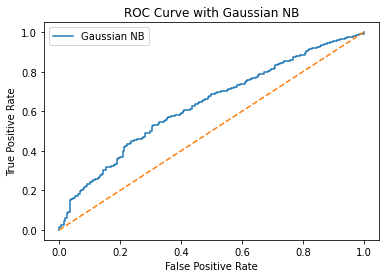

In [234]:
lr_probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Gaussian NB: ROC AUC Score=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, label='Gaussian NB')
plt.plot([0,1], [0,1], ls='--')
# axis labels
plt.title('ROC Curve with Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

HoneyBee1
HoneyBee2
Bumblebee1


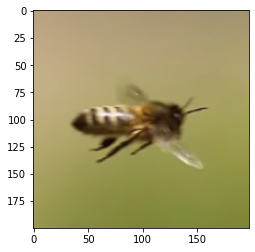

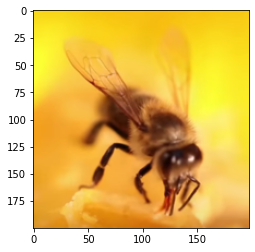

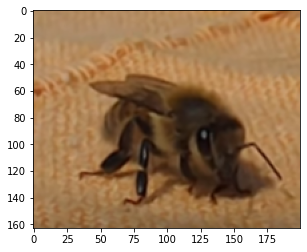

In [402]:
def get_image(filenm, root=''):
    print(filenm)
    filename = "{}.png".format(filenm)
    file_path = os.path.join(root, filename)
    img = io.imread(file_path)
    return np.array(img)

Honeybee1=get_image('HoneyBee1')
Honeybee2=get_image('HoneyBee2')
Bumblebee1=get_image('Bumblebee1')

plt.imshow(Honeybee1)
plt.show()
plt.imshow(Honeybee2)
plt.show()
plt.imshow(Bumblebee1)
plt.show()

In [403]:
hb1=features(honeybee1_to_gray)
hb1.shape

(18000,)

In [404]:
honeybee1_to_gray.shape

(100, 99)

In [405]:
def test_function(image):
    image_to_gray=rgb2grey(image)
    image_to_gray=rescale(image_to_gray, 0.5)
    
    plt.imshow(image_to_gray)
    plt.show()
        
    features_list = []

    image_features = features(image_to_gray)
    features_list.append(image_features)
    
    # convert list of arrays into a matrix
    honeybee1_matrix = np.array(features_list)
    pca1=honeybee1_matrix[::-1][:,:500]

    return pca1

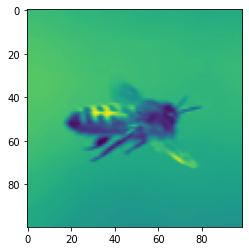

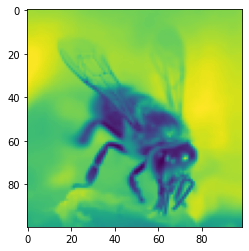

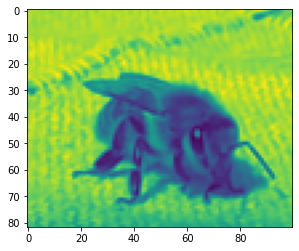

In [406]:
honeybee1_for_pca=test_function(Honeybee1)
honeybee2_for_pca=test_function(Honeybee2)
bumblebee1_for_pca=test_function(Bumblebee1)

In [407]:
gnb=GaussianNB()

In [408]:
clf= gnb.fit(X_train, y_train)


hb1= clf.predict(honeybee1_for_pca)
hb2= clf.predict(honeybee2_for_pca)
hb3= clf.predict(bumblebee1_for_pca)

print(hb1, hb2, hb3)
# print(clf.score(X_test,y_test))
# print(clf.score(X_test,y_test))

[1.] [1.] [1.]


## SVM

In [15]:
model=SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))

0.798590130916415


In [60]:
grid_param={'kernel':('linear','rbf'),'C':[0.1,1]}

In [61]:
clf=GridSearchCV(SVC(),grid_param,scoring=f1_scorer)
clf.fit(X_train,y_train)
print('Best Score',clf.best_score_,'with',clf.best_params_,'\n')
x=clf.best_params_


Best Score 0.8835005936083803 with {'C': 1, 'kernel': 'rbf'} 



In [77]:
model=SVC(kernel=x['kernel'],C=x['C'],random_state=27,probability=True)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.798590130916415

In [78]:
y_train_pred=model.predict(X_train)
y_pred = model.predict(X_test)

print('\tClassification Report of best feature SVM')
print(metrics.classification_report(y_test,y_pred))

print('Train Accuracy:\t{0:.3f}'.format(accuracy_score(y_train_pred, y_train)))
print('Test Accuracy:\t {0:.3f}'.format(accuracy_score(y_pred, y_test)))

	Classification Report of best feature SVM
              precision    recall  f1-score   support

         0.0       1.00      0.03      0.07       207
         1.0       0.80      1.00      0.89       786

    accuracy                           0.80       993
   macro avg       0.90      0.52      0.48       993
weighted avg       0.84      0.80      0.72       993

Train Accuracy:	0.868
Test Accuracy:	 0.799


SVM: ROC AUC Score=0.712


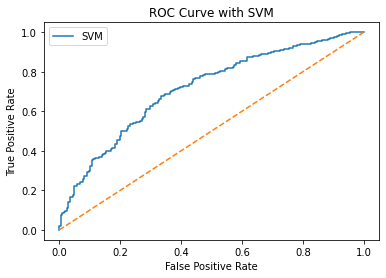

In [81]:
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('SVM: ROC AUC Score=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, label='SVM')
plt.plot([0,1], [0,1], ls='--')
# axis labels
plt.title('ROC Curve with SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [365]:
model=SVC(kernel=x['kernel'],C=x['C'],random_state=27,probability=True)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.798590130916415

In [409]:
hb1= model.predict(honeybee1_for_pca)
hb2= model.predict(honeybee2_for_pca)
hb3= model.predict(bumblebee1_for_pca)


print(hb1, hb2, hb3)

[1.] [1.] [1.]


### Lin C=1 has highest f1 

In [ ]:
model=SVC(kernel='linear',C=1,random_state=27)


model.fit(X_train,y_train)
model.score(X_test,y_test)

In [18]:
y_train_pred=model.predict(X_train)
y_pred = model.predict(X_test)

print('\tClassification Report of best feature')
print(metrics.classification_report(y_test,y_pred))

print('Train Accuracy:\t{0:.3f}'.format(accuracy_score(y_train_pred, y_train)))
print('Test Accuracy:\t {0:.3f}'.format(accuracy_score(y_pred, y_test)))

	Classification Report of best feature
              precision    recall  f1-score   support

         0.0       0.34      0.28      0.30       207
         1.0       0.82      0.86      0.84       786

    accuracy                           0.74       993
   macro avg       0.58      0.57      0.57       993
weighted avg       0.72      0.74      0.73       993

Train Accuracy:	0.850
Test Accuracy:	 0.737
